#  Exploring Guest Sentiments at Hotel Pullman Paris Tour Eiffel: A Comprehensive Sentiment Analysis of European Hotel Reviews

## Context  
In this project, we aim to delve into the sentiments expressed by guests in their reviews of the renowned Hotel Pullman Paris Tour Eiffel, situated in Europe. Leveraging the power of sentiment analysis, we seek to understand the overarching emotions and opinions conveyed by guests through their feedback. By analyzing the textual content of the reviews, we aim to uncover patterns, trends, and key insights that can provide valuable information to the hotel management for enhancing guest satisfaction and improving overall guest experience. This study not only contributes to the understanding of guest sentiments but also provides actionable recommendations for the hospitality industry, with a focus on Hotel Pullman Paris Tour Eiffel.


In [51]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from summarytools import dfSummary

In [52]:
# Importing Dataset
Data = pd.read_csv(r"C:\Users\ABC\Downloads\hotel_reviews.csv")
Data.sample(5)

Review  Rating
4509  especially art fan stay, really loved hotel pr...       4
7303  better n't believe hotel standards ritz-carlto...       4
3490  no major complaints stayed hotel summer, posit...       3
2034  pleasant stay wondeful location husband enjoye...       4
7370  great place stay good price located downtown l...       4

## About Dataset

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!

In [53]:
dfSummary(Data)

In [54]:
    Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [55]:
# Checking null values
Data.isna().sum()

Review    0
Rating    0
dtype: int64

In [56]:
Data.describe().round(2)

Rating
count  20491.00
mean       3.95
std        1.23
min        1.00
25%        3.00
50%        4.00
75%        5.00
max        5.00

In [57]:
# Checking for any duplicate rows
Data.duplicated().sum()

0

## Visualizing Trends & Patterns

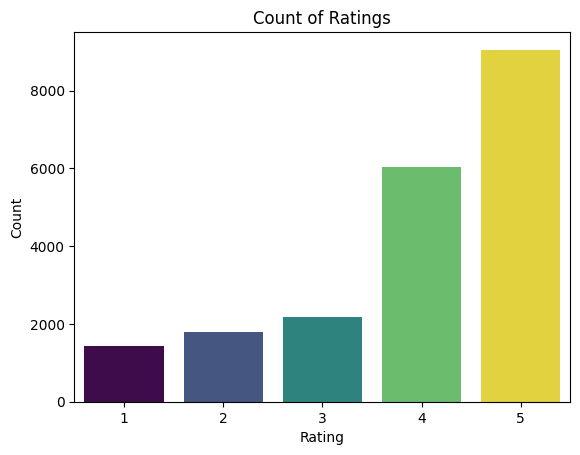

In [58]:
sns.countplot(x='Rating', data=Data, hue='Rating', palette='viridis', legend=False)
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

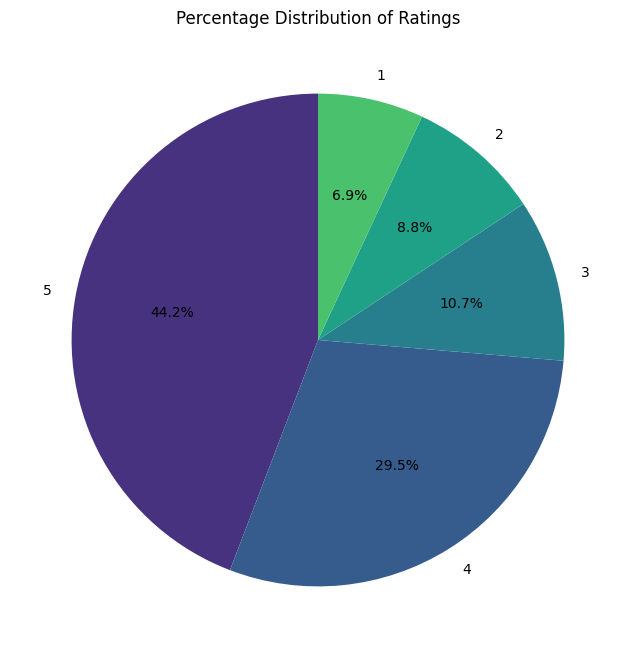

In [59]:
# Calculating the percentage distribution
rating_counts = Data['Rating'].value_counts(normalize=True) * 100

# Plotting the pie chart with seaborn
plt.figure(figsize=(8, 8))
sns.set_palette("viridis")
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Ratings')
plt.show()

In [60]:
# Adding a new column Length of word in sentence
Data['Length'] = Data['Review'].apply(len)
Data.head()

Review  Rating  Length
0  nice hotel expensive parking got good deal sta...       4     593
1  ok nothing special charge diamond member hilto...       2    1689
2  nice rooms not 4* experience hotel monaco seat...       3    1427
3  unique, great stay, wonderful time hotel monac...       5     600
4  great stay great stay, went seahawk game aweso...       5    1281

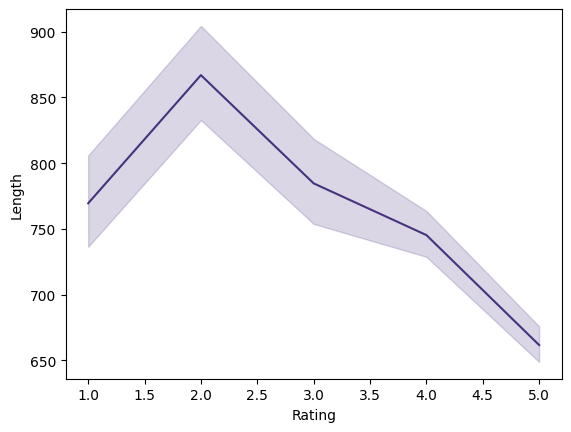

In [61]:
# Plotting the relationship between Rating and Length
sns.set_palette("viridis")
sns.lineplot(data = Data,x = 'Rating',y = 'Length')
plt.show()

In [62]:
# Extracting the rows with rating 5
Data_5 = Data[Data['Rating']==5]
Data_5.head()

Review  Rating  Length
3  unique, great stay, wonderful time hotel monac...       5     600
4  great stay great stay, went seahawk game aweso...       5    1281
5  love monaco staff husband stayed hotel crazy w...       5    1002
6  cozy stay rainy city, husband spent 7 nights m...       5     748
8  hotel stayed hotel monaco cruise, rooms genero...       5     419

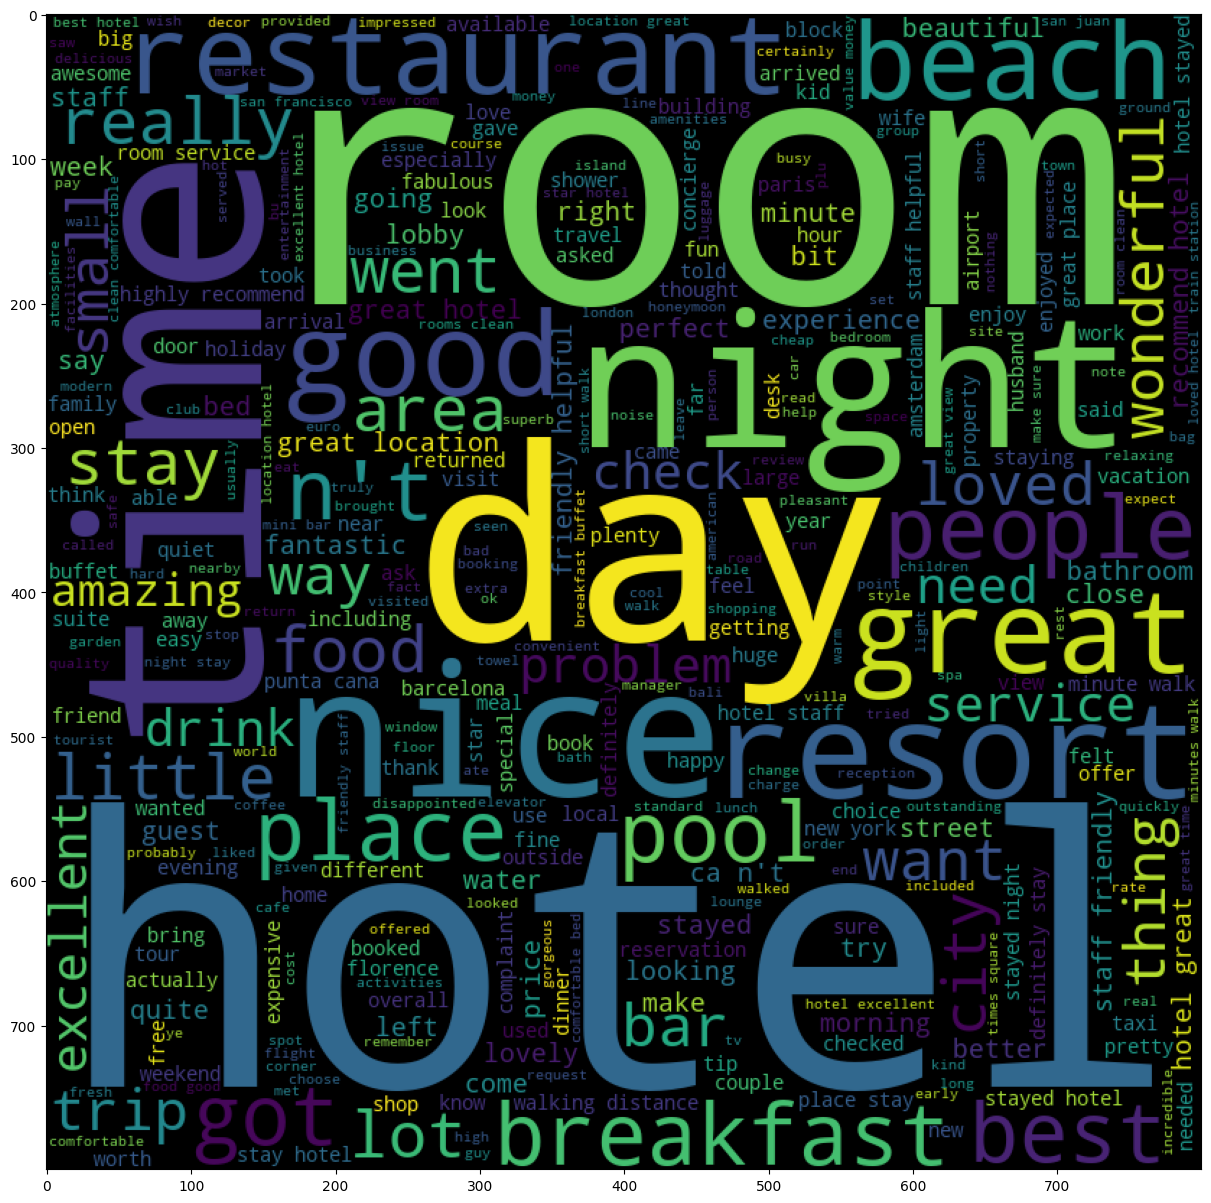

In [63]:
# Visualizing most common words from the reviews with rating 5
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, height=800,width=800,background_color="black").generate(' '.join(Data_5['Review']))
plt.imshow(wc1)

In [64]:
# Extracting the rows with rating 4
Data_4 = Data[Data['Rating']==4]
Data_4.head()

Review  Rating  Length
0   nice hotel expensive parking got good deal sta...       4     593
7   excellent staff, housekeeping quality hotel ch...       4     597
11  nice value seattle stayed 4 nights late 2007. ...       4     364
12  nice hotel good location hotel kimpton design ...       4     569
14  great hotel night quick business trip, loved l...       4     202

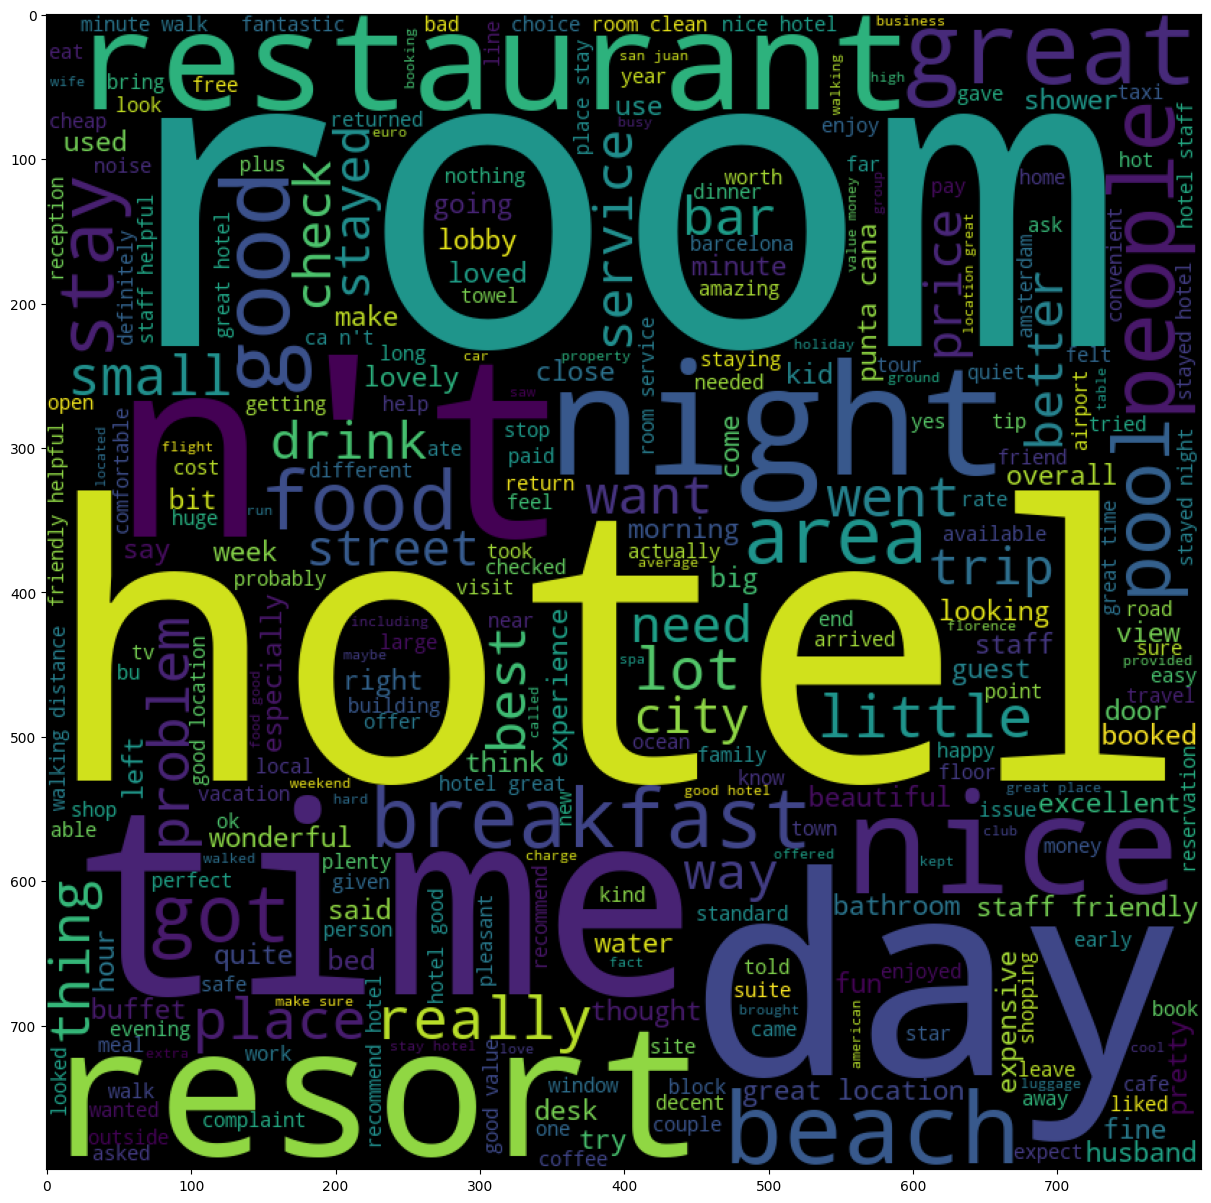

In [65]:
# Visualizing most common words from the reviews with rating 4
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, height=800,width=800,background_color="black").generate(' '.join(Data_4['Review']))
plt.imshow(wc2)

In [66]:
# Extracting the rows with rating 3
Data_3 = Data[Data['Rating']==3]
Data_3.head()

Review  Rating  Length
2   nice rooms not 4* experience hotel monaco seat...       3    1427
13  nice hotel not nice staff hotel lovely staff q...       3     417
19  hmmmmm say really high hopes hotel monaco chos...       3    1025
25  n't mind noise place great, read reviews noise...       3     482
27  met expectations centrally located hotel block...       3     538

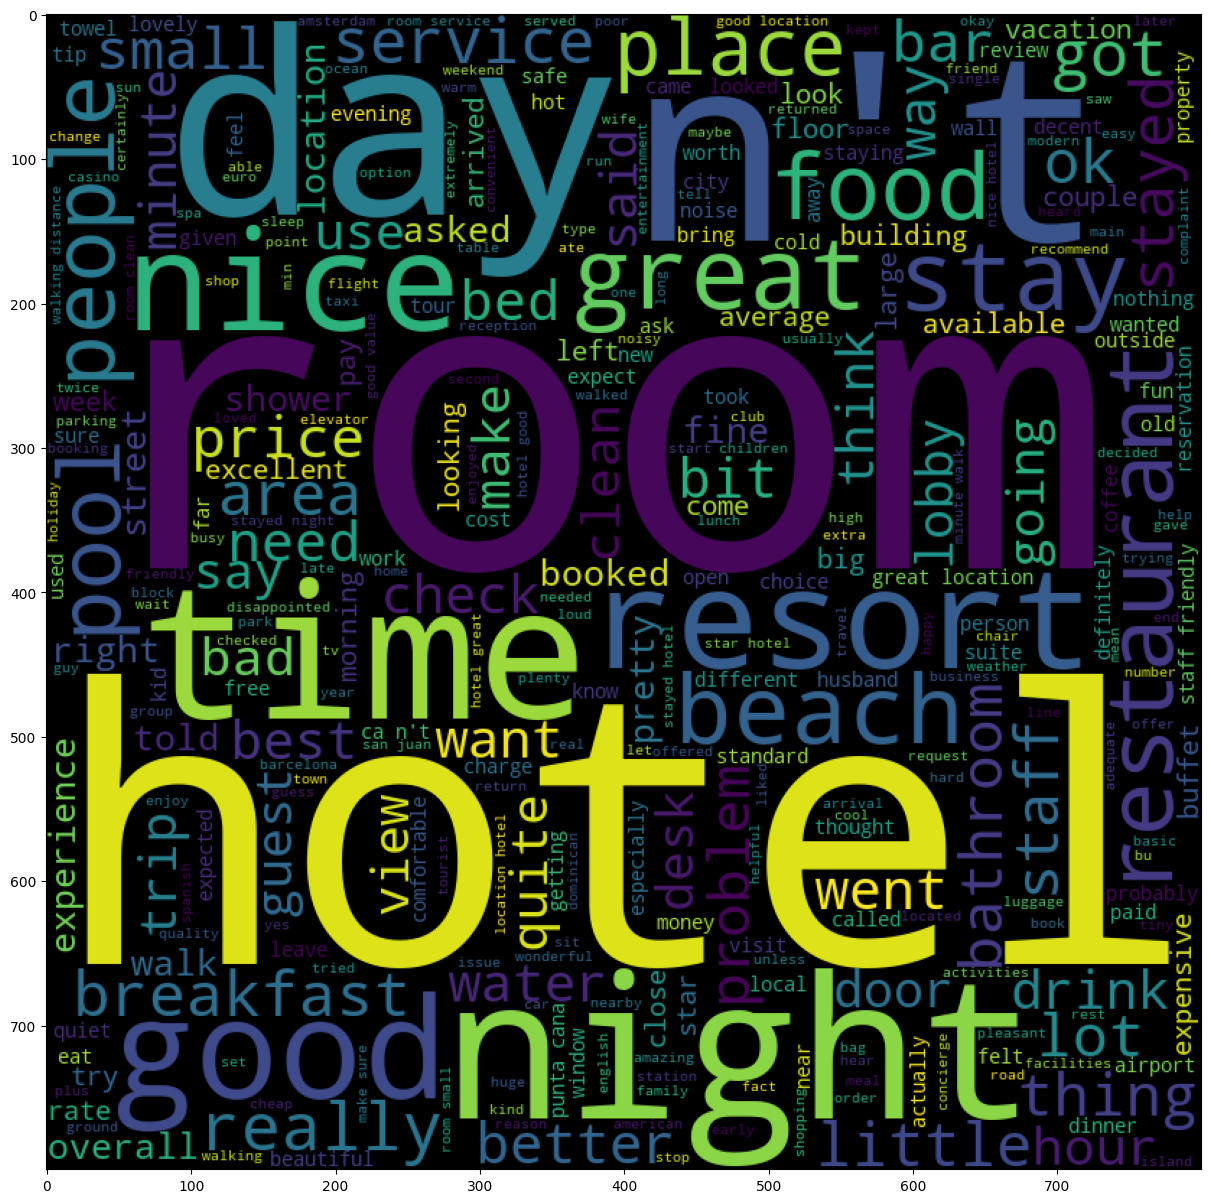

In [67]:
# Visualizing most common words from the reviews with rating 3
plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, height=800,width=800,background_color="black").generate(' '.join(Data_3['Review']))
plt.imshow(wc3)

In [68]:
# Extracting the rows with rating 2
Data_2 = Data[Data['Rating']==2]
Data_2.head()

Review  Rating  Length
1   ok nothing special charge diamond member hilto...       2    1689
10  poor value stayed monaco seattle july, nice ho...       2     333
16  disappointed say anticipating stay hotel monac...       2    1662
24  great location need internally upgrade advanta...       2     250
33  good location poor cleanliness warwick hotel g...       2     576

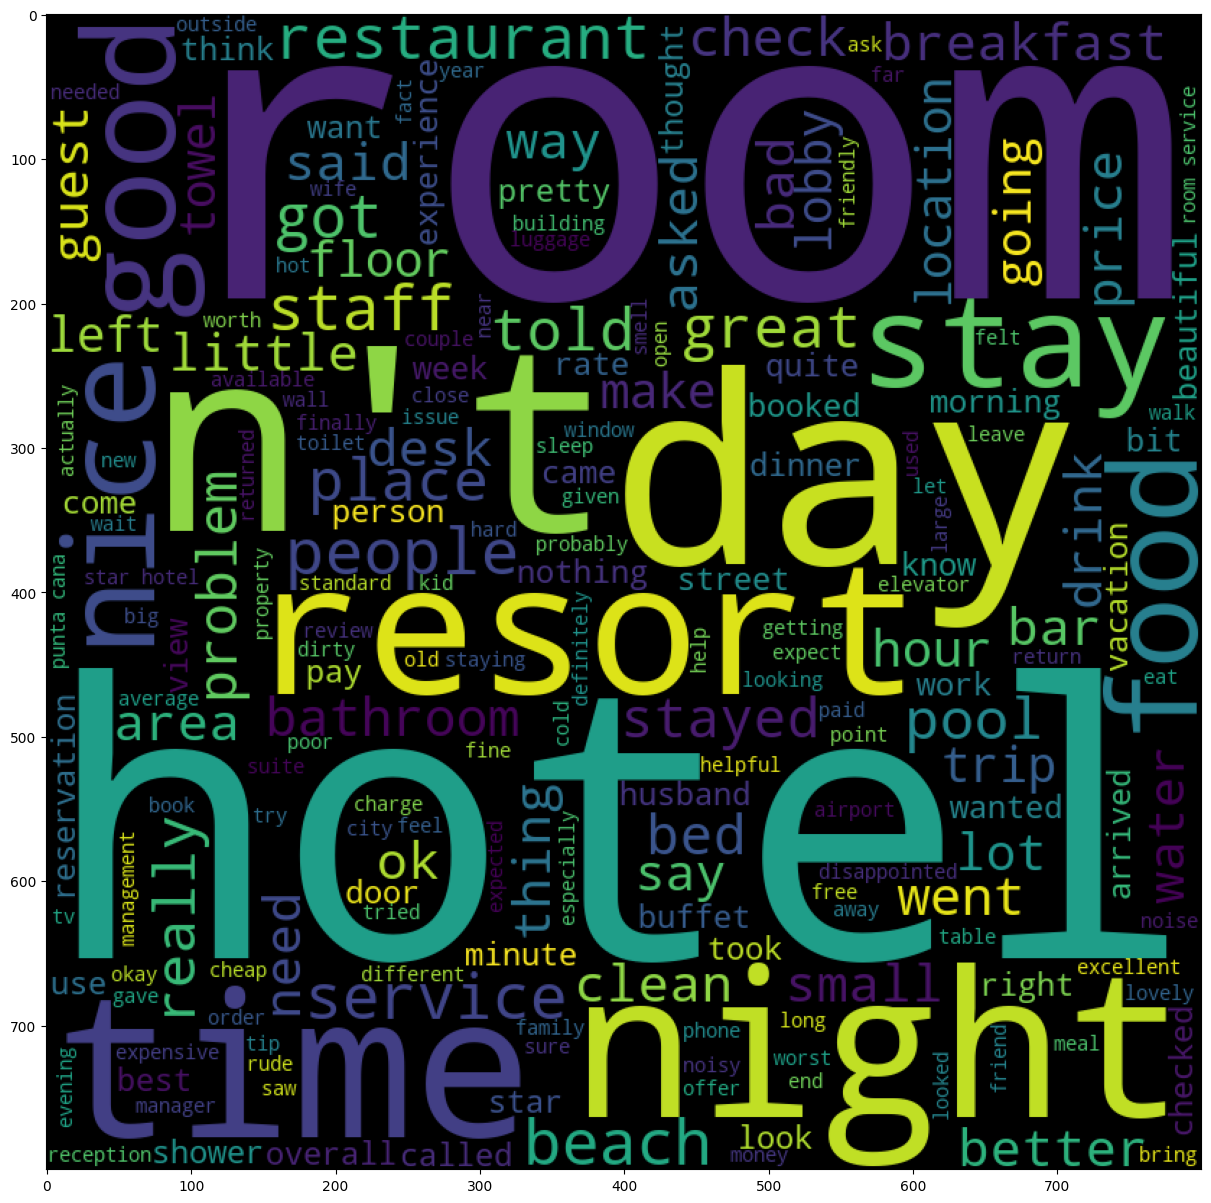

In [69]:
# Visualizing most common words from the reviews with rating 2
plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, height=800,width=800,background_color="black").generate(' '.join(Data_2['Review']))
plt.imshow(wc4)

In [70]:
# Extracting the rows with rating 1
Data_1 = Data[Data['Rating']==1]
Data_1.head()

Review  Rating  Length
15  horrible customer service hotel stay february ...       1    1411
32  noise airconditioner-a standard, arranged stay...       1     614
40  bad choice, booked hotel hot wire called immed...       1     861
65  hated inn terrible, room-service horrible staf...       1     133
69  ace grunge lives does mold mildew tiny bed met...       1      84

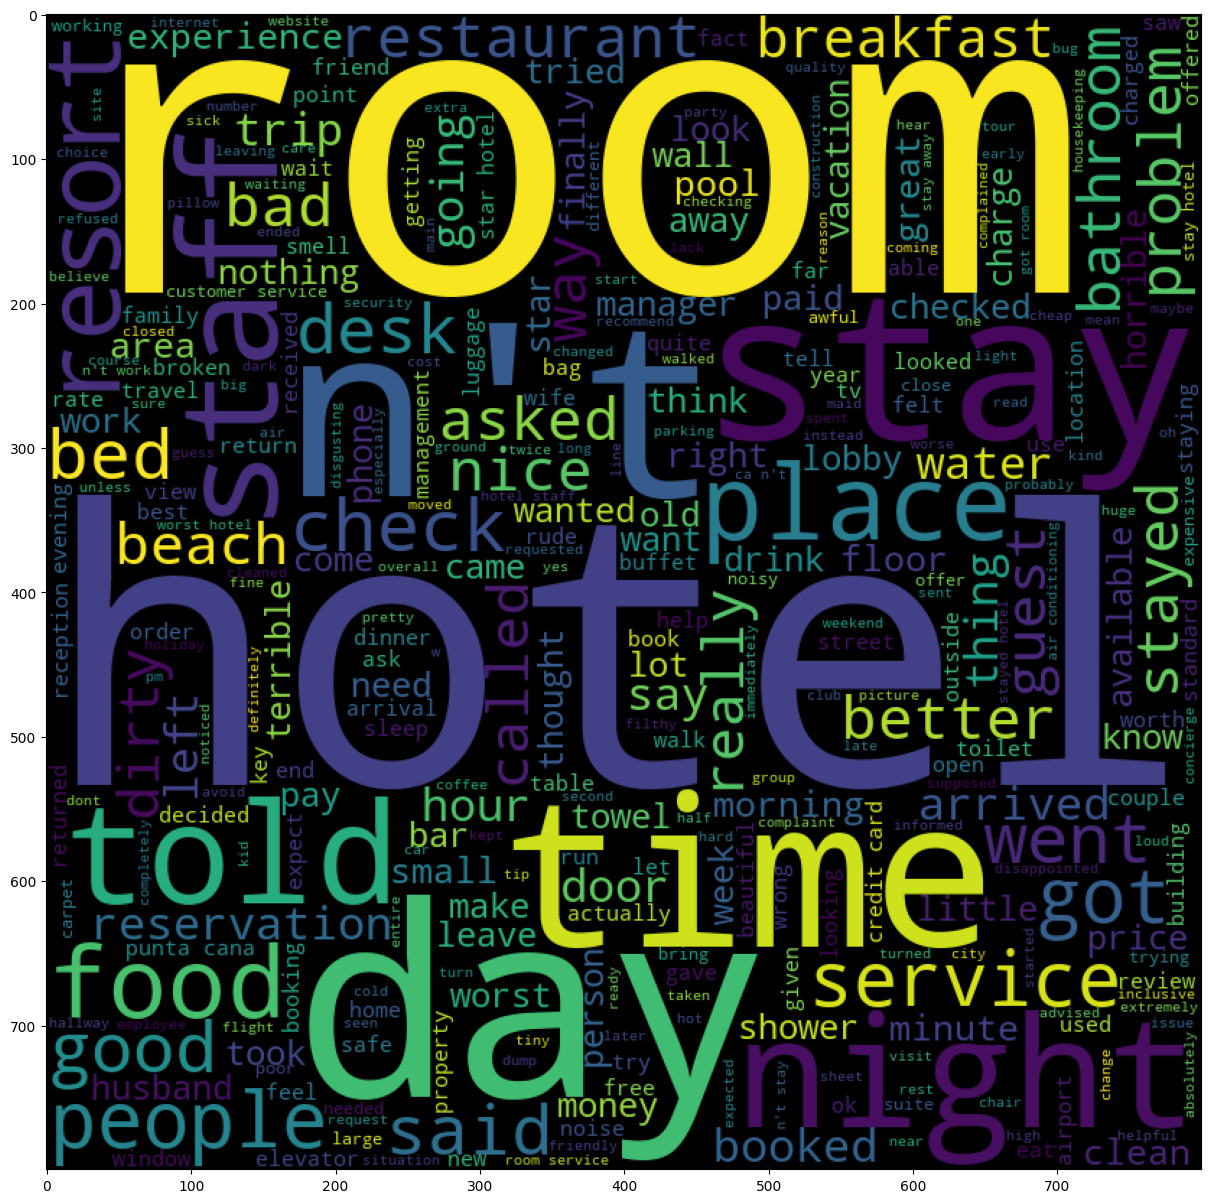

In [71]:
# Visualizing most common words from the reviews with rating 1
plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, height=800,width=800,background_color="black").generate(' '.join(Data_1['Review']))
plt.imshow(wc5)

## Making text clean for ML

In [72]:
Data.head()

Review  Rating  Length
0  nice hotel expensive parking got good deal sta...       4     593
1  ok nothing special charge diamond member hilto...       2    1689
2  nice rooms not 4* experience hotel monaco seat...       3    1427
3  unique, great stay, wonderful time hotel monac...       5     600
4  great stay great stay, went seahawk game aweso...       5    1281

In [73]:
#Importing necessary libraries from NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [74]:
# downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
sw = set(stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

These are some of the common English stopwords that NLTK provides. They are often removed from text data during preprocessing to focus on the more meaningful words for analysis.

In [76]:
# Defining a function for cleaning all the reviews
def text_preprocessing(a):
  a=re.sub('[^a-zA-Z0-9]',' ',a)
  a=a.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [77]:
Data['Cleaned_Review'] = Data['Review'].apply(text_preprocessing)
Data.head()

Review  Rating  Length  \
0  nice hotel expensive parking got good deal sta...       4     593   
1  ok nothing special charge diamond member hilto...       2    1689   
2  nice rooms not 4* experience hotel monaco seat...       3    1427   
3  unique, great stay, wonderful time hotel monac...       5     600   
4  great stay great stay, went seahawk game aweso...       5    1281   

                                      Cleaned_Review  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room 4 experi hotel monaco seattl good ho...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

In [78]:
# Adding a new column named 'Length2' that will denote the length of cleaned review
Data['Length2'] = Data['Cleaned_Review'].apply(len)
Data.head()

Review  Rating  Length  \
0  nice hotel expensive parking got good deal sta...       4     593   
1  ok nothing special charge diamond member hilto...       2    1689   
2  nice rooms not 4* experience hotel monaco seat...       3    1427   
3  unique, great stay, wonderful time hotel monac...       5     600   
4  great stay great stay, went seahawk game aweso...       5    1281   

                                      Cleaned_Review  Length2  
0  nice hotel expens park got good deal stay hote...      484  
1  ok noth special charg diamond member hilton de...     1428  
2  nice room 4 experi hotel monaco seattl good ho...     1216  
3  uniqu great stay wonder time hotel monaco loca...      508  
4  great stay great stay went seahawk game awesom...     1062

In [79]:
Data.describe().round(2)

Rating   Length   Length2
count  20491.00  20491.0  20491.00
mean       3.95    724.9    606.51
std        1.23    689.1    573.95
min        1.00     44.0     31.00
25%        3.00    339.0    284.50
50%        4.00    537.0    450.00
75%        5.00    859.0    721.00
max        5.00  13501.0  11302.00

## Building a machine learning model for classification

In [80]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [83]:
# now we need change the Cleaned_Review to number-array using CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(Data["Cleaned_Review"]).toarray()
Y = Data["Rating"]

MemoryError: Unable to allocate 5.84 GiB for an array with shape (20491, 38248) and data type int64

* X: It represents the feature matrix, which contains the input variables or features used to make predictions. 

* Y: It represents the target vector, which contains the corresponding labels or values that the model aims to predict.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", Y_train.shape)
print("Y Test  : ", Y_test.shape)

##  Applying Machine Learning Models

In [ ]:
LR = LogisticRegression()
GNB = GaussianNB()
RFR = RandomForestClassifier()
DTR = DecisionTreeClassifier()

In [ ]:
li = [LR,GNB,RFR,DTR]
d = {}
for i in li:
    i.fit(X_train,Y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(Y_test,ypred)*100)
    d.update({str(i):i.score(X_test,Y_test)*100})